# Support Vector Machine

## Import Modules and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/sanja/Downloads/Immunotherapy.csv")
df

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1
...,...,...,...,...,...,...,...,...
85,1,40,5.50,8,3,69,5,1
86,1,38,7.50,8,2,56,45,1
87,1,46,11.50,4,1,91,25,0
88,1,32,12.00,9,1,43,50,0


In [ ]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

<AxesSubplot:>

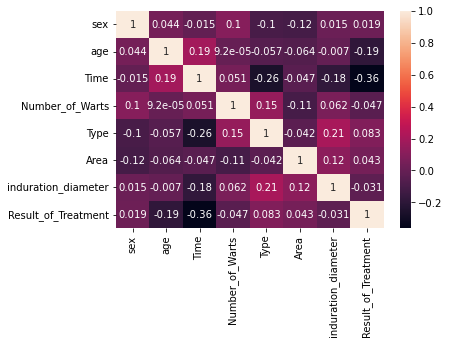

In [ ]:
sns.heatmap(df.corr(), annot=True)

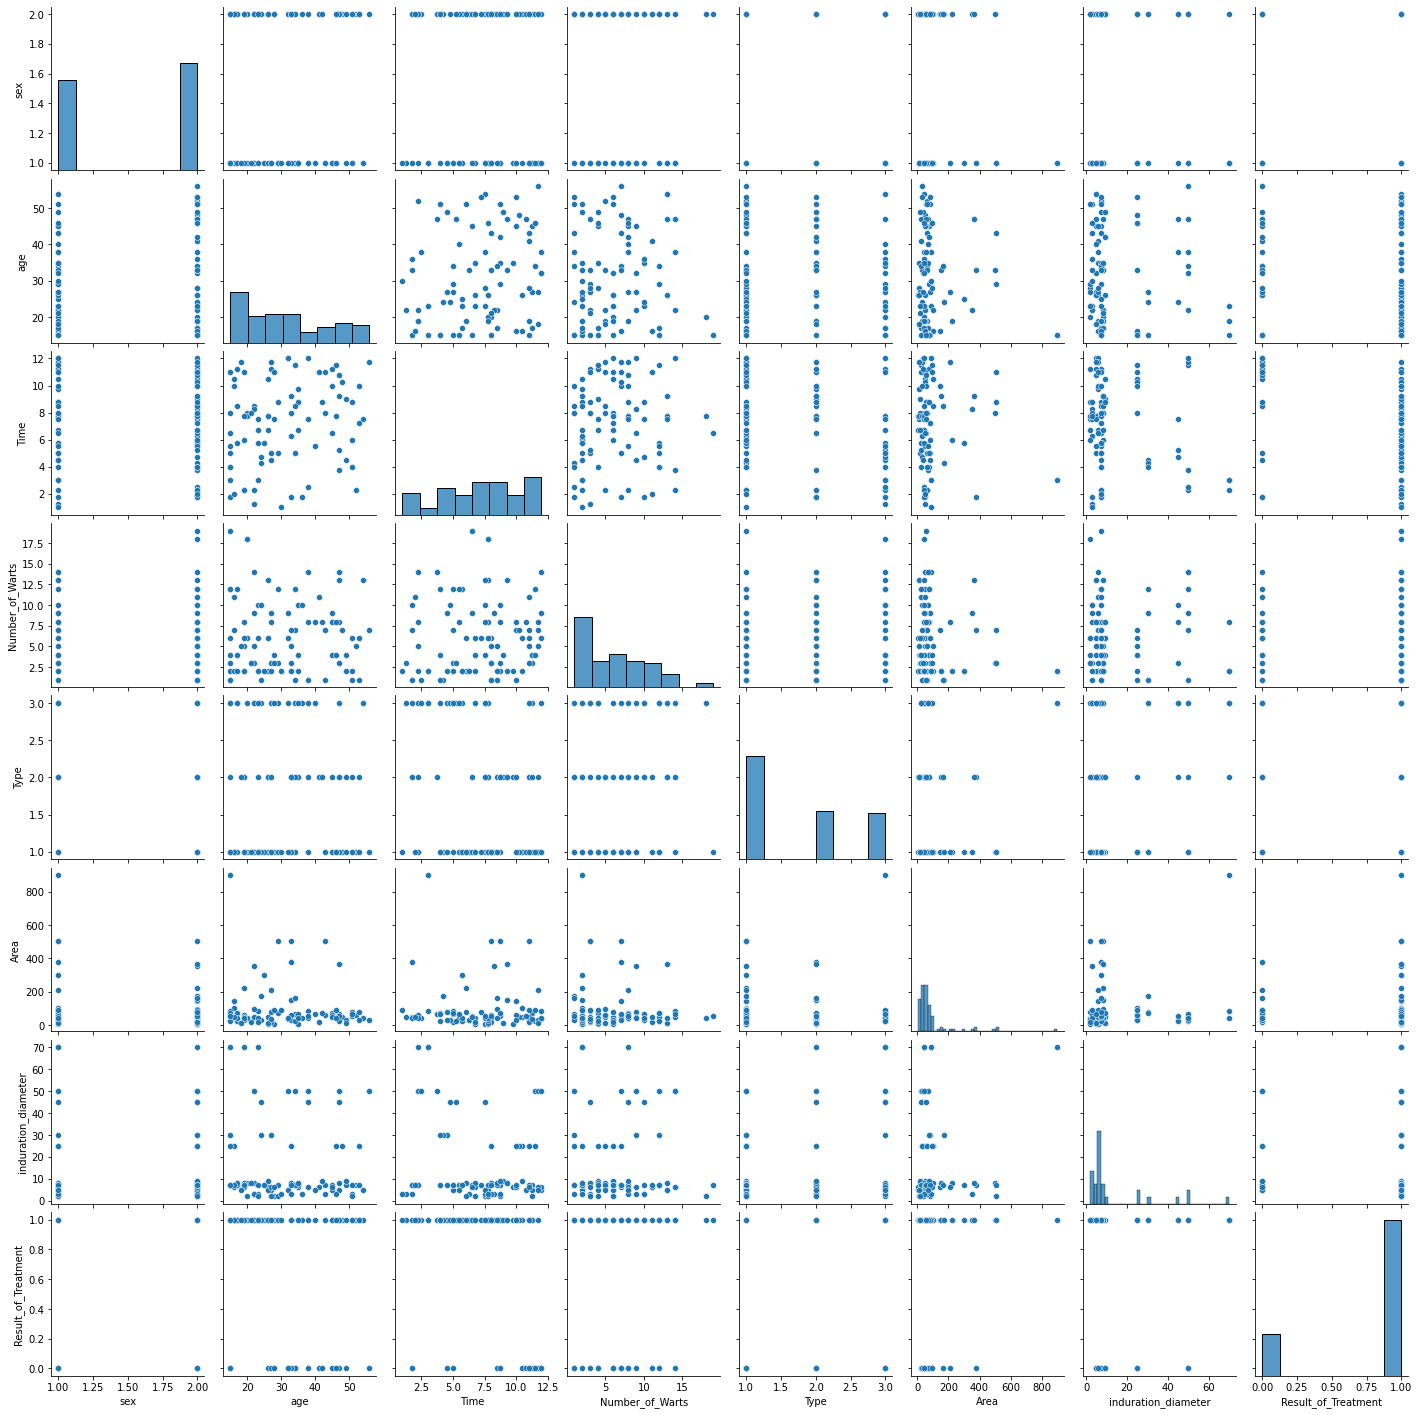

In [ ]:
sns.pairplot(df)

# Splitting the Feature and Target

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.shape, y.shape

((90, 7), (90,))

## Splitting the Feature and Target into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((72, 7), (18, 7), (72,), (18,))

## Fitting into the Model

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [ ]:
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

## Predict the test result and validate the score

In [ ]:
ypred = svm.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ypred, ytest), confusion_matrix(ypred, ytest)

(0.8333333333333334,
 array([[ 0,  0],
        [ 3, 15]], dtype=int64))

In [ ]:
kernels = {'linear', 'poly', 'rbf', 'sigmoid'}
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(xtrain, ytrain)
    print(i, svm.score(xtest, ytest))

poly 0.8333333333333334
sigmoid 0.8333333333333334
rbf 0.8333333333333334
linear 0.8333333333333334


In [ ]:
svm.score(xtest, ytest)

0.8333333333333334